In [1]:
import os
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_excel(path):
    return pd.read_excel(path)
    
def days_in_month(year, month):
    return calendar.monthrange(year, month)[1]

In [3]:
file = 'losarang_2023'
path = 'Data Losarang/2023'
path_1 = '../Data/Preprocessing/' + path + '/2_input_' + file + '.xlsx'

df = read_excel(path_1)
df.head()

,WAKTU,TAHUN,BULAN,PEKAN,TANGGAL,HARI,JAM,MOTOR,MOBIL,TRUK/BUS,JUMLAH,SMP_MTR,SMP_MBL,SMP_TRK,SMP
0,2023-01-01 00:00:00,2023,1,1,1,Sunday,00:00,85,24,4,113,68.0,24,10.0,102
1,2023-01-01 00:15:00,2023,1,1,1,Sunday,00:15,92,19,6,117,73.6,19,15.0,108
2,2023-01-01 00:30:00,2023,1,1,1,Sunday,00:30,78,16,6,100,62.4,16,15.0,93
3,2023-01-01 00:45:00,2023,1,1,1,Sunday,00:45,78,23,4,105,62.4,23,10.0,95
4,2023-01-01 01:00:00,2023,1,1,1,Sunday,01:00,76,14,6,96,60.8,14,15.0,90


In [4]:
df['SMP'] = df['SMP_MTR']+df['SMP_MBL']+df['SMP_TRK']

In [5]:
df.head()

,WAKTU,TAHUN,BULAN,PEKAN,TANGGAL,HARI,JAM,MOTOR,MOBIL,TRUK/BUS,JUMLAH,SMP_MTR,SMP_MBL,SMP_TRK,SMP
0,2023-01-01 00:00:00,2023,1,1,1,Sunday,00:00,85,24,4,113,68.0,24,10.0,102.0
1,2023-01-01 00:15:00,2023,1,1,1,Sunday,00:15,92,19,6,117,73.6,19,15.0,107.6
2,2023-01-01 00:30:00,2023,1,1,1,Sunday,00:30,78,16,6,100,62.4,16,15.0,93.4
3,2023-01-01 00:45:00,2023,1,1,1,Sunday,00:45,78,23,4,105,62.4,23,10.0,95.4
4,2023-01-01 01:00:00,2023,1,1,1,Sunday,01:00,76,14,6,96,60.8,14,15.0,89.8


In [6]:
df_smp = df[['WAKTU','TAHUN', 'BULAN', 'TANGGAL', 'HARI','JAM','MOTOR','MOBIL','TRUK/BUS',
                              'SMP_MTR','SMP_MBL','SMP_TRK','SMP']]

In [7]:
df_smp.head()

,WAKTU,TAHUN,BULAN,TANGGAL,HARI,JAM,MOTOR,MOBIL,TRUK/BUS,SMP_MTR,SMP_MBL,SMP_TRK,SMP
0,2023-01-01 00:00:00,2023,1,1,Sunday,00:00,85,24,4,68.0,24,10.0,102.0
1,2023-01-01 00:15:00,2023,1,1,Sunday,00:15,92,19,6,73.6,19,15.0,107.6
2,2023-01-01 00:30:00,2023,1,1,Sunday,00:30,78,16,6,62.4,16,15.0,93.4
3,2023-01-01 00:45:00,2023,1,1,Sunday,00:45,78,23,4,62.4,23,10.0,95.4
4,2023-01-01 01:00:00,2023,1,1,Sunday,01:00,76,14,6,60.8,14,15.0,89.8


In [8]:
len(df_smp)

35040

# Group SMP Per Jam

In [9]:
# Round down the WAKTU column to the nearest hour
df_smp_jam = df_smp.copy()
df_smp_jam['JAM'] = df_smp['WAKTU'].dt.floor('H')

# Drop the original WAKTU column if it's not needed anymore
df_smp_jam = df_smp_jam.drop(columns=['WAKTU'])

# Format the 'JAM' column to show only hour and minute
df_smp_jam['JAM'] = df_smp_jam['JAM'].dt.strftime('%H:%M')

# Group by the rounded-down hour and sum the SMP column
df_smp_jam = df_smp_jam.groupby(['TAHUN', 'BULAN', 'TANGGAL', 'HARI', 'JAM'], as_index=False).sum()

In [10]:
df_smp_jam.head()

,TAHUN,BULAN,TANGGAL,HARI,JAM,MOTOR,MOBIL,TRUK/BUS,SMP_MTR,SMP_MBL,SMP_TRK,SMP
0,2023,1,1,Sunday,00:00,333,82,20,266.4,82,50.0,398.4
1,2023,1,1,Sunday,01:00,282,69,19,225.6,69,47.5,342.1
2,2023,1,1,Sunday,02:00,203,77,14,162.4,77,35.0,274.4
3,2023,1,1,Sunday,03:00,127,54,20,101.6,54,50.0,205.6
4,2023,1,1,Sunday,04:00,18,46,10,14.4,46,25.0,85.4


In [11]:
len(df_smp_jam)

8760

In [12]:
df_smp_jam.to_excel('../Data/Preprocessing/' + path + '/8_smp_jam_' + file + '.xlsx', index=False)

# Group SMP Per Hari

In [13]:
df_smp_hari = df_smp_jam.copy()

In [14]:
df_smp_hari = df_smp_hari.drop(columns=['JAM'])

In [15]:
df_smp_hari = df_smp_hari.groupby(['TAHUN', 'BULAN', 'TANGGAL', 'HARI'], as_index=False).sum()

In [16]:
df_smp_hari['RT_JAM'] = df_smp_hari['SMP']/24

In [17]:
df_smp_hari.head()

,TAHUN,BULAN,TANGGAL,HARI,MOTOR,MOBIL,TRUK/BUS,SMP_MTR,SMP_MBL,SMP_TRK,SMP,RT_JAM
0,2023,1,1,Sunday,11515,5153,1709,9212.0,5153,4272.5,18637.5,776.562500
1,2023,1,2,Monday,13601,5358,3305,10880.8,5358,8262.5,24501.3,1020.887500
2,2023,1,3,Tuesday,11950,5736,5052,9560.0,5736,12630.0,27926.0,1163.583333
3,2023,1,4,Wednesday,11496,6170,5744,9196.8,6170,14360.0,29726.8,1238.616667
4,2023,1,5,Thursday,11295,6252,6205,9036.0,6252,15512.5,30800.5,1283.354167


In [18]:
len(df_smp_hari)

365

In [19]:
df_smp_hari.to_excel('../Data/Preprocessing/' + path + '/8_smp_hari_' + file + '.xlsx', index=False)

# Group SMP Per Bulan

In [20]:
df_smp_bln = df_smp_hari.copy()

In [21]:
df_smp_bln = df_smp_bln.drop(columns=['TANGGAL','HARI','RT_JAM'])

In [22]:
df_smp_bln.head()

,TAHUN,BULAN,MOTOR,MOBIL,TRUK/BUS,SMP_MTR,SMP_MBL,SMP_TRK,SMP
0,2023,1,11515,5153,1709,9212.0,5153,4272.5,18637.5
1,2023,1,13601,5358,3305,10880.8,5358,8262.5,24501.3
2,2023,1,11950,5736,5052,9560.0,5736,12630.0,27926.0
3,2023,1,11496,6170,5744,9196.8,6170,14360.0,29726.8
4,2023,1,11295,6252,6205,9036.0,6252,15512.5,30800.5


In [23]:
df_smp_bln = df_smp_bln.groupby(['TAHUN', 'BULAN'], as_index=False).sum()
df_smp_bln['LHR_BLN'] = df_smp_bln.apply(lambda row: row['SMP'] / days_in_month(int(row['TAHUN']), int(row['BULAN'])), axis=1)

In [24]:
df_smp_bln.head()

,TAHUN,BULAN,MOTOR,MOBIL,TRUK/BUS,SMP_MTR,SMP_MBL,SMP_TRK,SMP,LHR_BLN
0,2023,1,380564,191318,191387,304451.2,191318,478467.5,974236.7,31426.990323
1,2023,2,379044,187672,215868,303235.2,187672,539670.0,1030577.2,36806.328571
2,2023,3,398767,202636,261097,319013.6,202636,652742.5,1174392.1,37883.616129
3,2023,4,819176,328202,204103,655340.8,328202,510257.5,1493800.3,49793.343333
4,2023,5,402252,283614,240827,321801.6,283614,602067.5,1207483.1,38951.067742


In [25]:
len(df_smp_bln)

12

In [26]:
df_smp_bln.to_excel('../Data/Preprocessing/' + path + '/8_smp_bulan_' + file + '.xlsx', index=False)

# Menghitung LHRT (AADT)

In [27]:
# Menghitung AADT
aadts = {}
for month in df_smp_hari['BULAN'].unique():
    monthly_data = df_smp_hari[df_smp_hari['BULAN'] == month]
    weekly_averages = []
    for day in monthly_data['HARI'].unique():
        daily_data = monthly_data[monthly_data['HARI'] == day]
        daily_average = daily_data['SMP'].mean()
        weekly_averages.append(daily_average)
    monthly_average = np.mean(weekly_averages)
    aadts[month] = monthly_average

# Mengubah dictionary menjadi DataFrame
aadts_df = pd.DataFrame(list(aadts.items()), columns=['BULAN', 'LHR_BLN'])

In [28]:
aadts_df.head(12)

,BULAN,LHR_BLN
0,1,31654.157857
1,2,36806.328571
2,3,37855.697857
3,4,50281.225714
4,5,38747.266429
5,6,36991.007857
6,7,38215.600000
7,8,37244.538571
8,9,37559.731429
9,10,38072.558571


In [29]:
aadt = aadts_df['LHR_BLN'].mean()
print(f"Estimated AADT is {aadt}")

Estimated AADT is 38086.730833333335


In [30]:
aadt_simple = df_smp_hari['SMP'].mean()
print(f"Estimated AADT is {aadt_simple}")

Estimated AADT is 38030.891506849315


In [31]:
aadts_df.to_excel('../Data/Preprocessing/' + path + '/8_aadt_bulan_' + file + '.xlsx', index=False)

In [32]:
aadts_df

,BULAN,LHR_BLN
0,1,31654.157857
1,2,36806.328571
2,3,37855.697857
3,4,50281.225714
4,5,38747.266429
5,6,36991.007857
6,7,38215.600000
7,8,37244.538571
8,9,37559.731429
9,10,38072.558571


# Menghitung Faktor K

In [33]:
df_k = df_smp_jam.copy()
df_k = df_k.sort_values('SMP', ascending=False)
df_k = df_k.reset_index(drop=True)

In [34]:
df_k.head()

,TAHUN,BULAN,TANGGAL,HARI,JAM,MOTOR,MOBIL,TRUK/BUS,SMP_MTR,SMP_MBL,SMP_TRK,SMP
0,2023,4,20,Thursday,06:00,8596,784,106,6876.8,784,265.0,7925.8
1,2023,4,20,Thursday,05:00,8096,733,107,6476.8,733,267.5,7477.3
2,2023,4,20,Thursday,11:00,6826,1058,269,5460.8,1058,672.5,7191.3
3,2023,4,20,Thursday,07:00,7419,735,116,5935.2,735,290.0,6960.2
4,2023,4,20,Thursday,09:00,6965,880,200,5572.0,880,500.0,6952.0


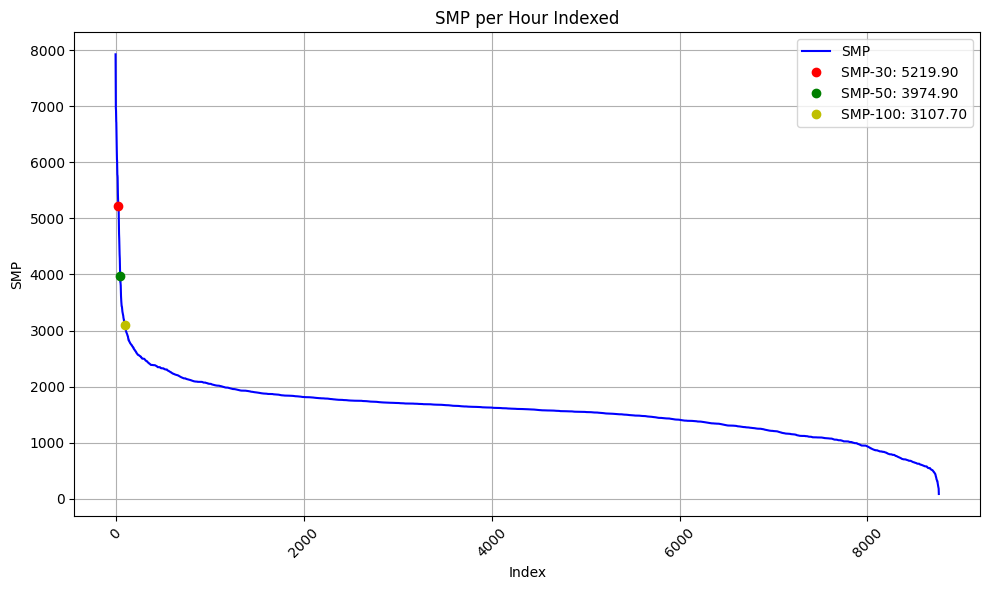

In [35]:
# Assuming df_k_200 is already sorted by 'SMP'
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the entire SMP data
ax.plot(df_k.index, df_k['SMP'], linestyle='-', color='blue', label='SMP')

# Highlight the 30th, 50th, and 100th highest volumes
k30_point = ax.plot(29, df_k.iloc[29]['SMP'], 'ro', label=f'SMP-30: {df_k.iloc[29]["SMP"]:.2f}')
k50_point = ax.plot(49, df_k.iloc[49]['SMP'], 'go', label=f'SMP-50: {df_k.iloc[49]["SMP"]:.2f}')
k100_point = ax.plot(99, df_k.iloc[99]['SMP'], 'yo', label=f'SMP-100: {df_k.iloc[99]["SMP"]:.2f}')

# Setting plot titles and labels
ax.set_title('SMP per Hour Indexed')
ax.set_xlabel('Index')
ax.set_ylabel('SMP')
ax.grid(True)

# Adding legend
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../Data/Visualisasi/Losarang/2023/8_smp_hour_sort_' + file + '.png')
plt.show()

In [36]:
df_k_200 = df_k.head(200)

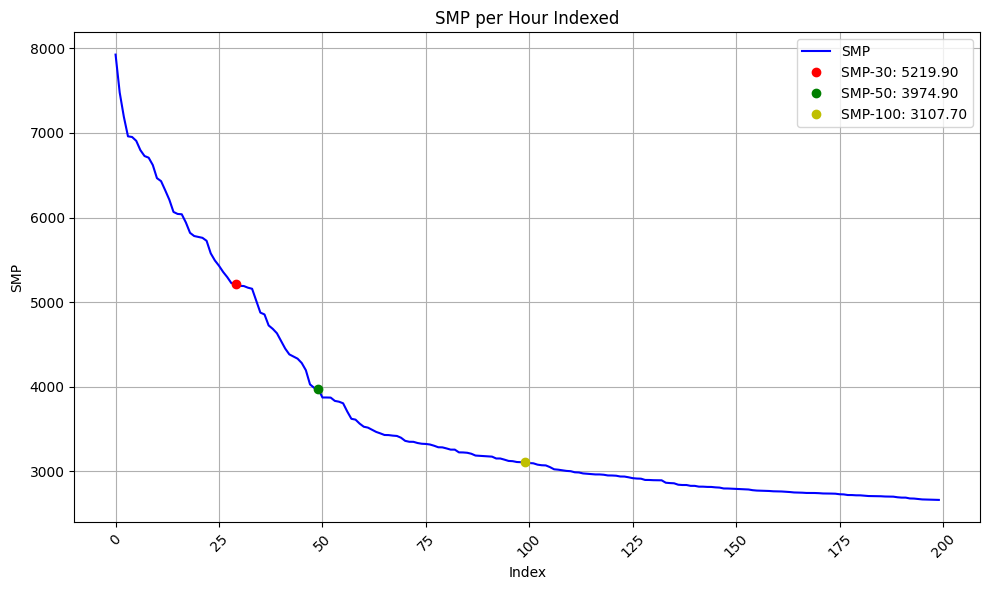

In [37]:
# Assuming df_k_200 is already sorted by 'SMP'
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the entire SMP data
ax.plot(df_k_200.index, df_k_200['SMP'], linestyle='-', color='blue', label='SMP')

# Highlight the 30th, 50th, and 100th highest volumes
k30_point = ax.plot(29, df_k_200.iloc[29]['SMP'], 'ro', label=f'SMP-30: {df_k_200.iloc[29]["SMP"]:.2f}')
k50_point = ax.plot(49, df_k_200.iloc[49]['SMP'], 'go', label=f'SMP-50: {df_k_200.iloc[49]["SMP"]:.2f}')
k100_point = ax.plot(99, df_k_200.iloc[99]['SMP'], 'yo', label=f'SMP-100: {df_k_200.iloc[99]["SMP"]:.2f}')

# Setting plot titles and labels
ax.set_title('SMP per Hour Indexed')
ax.set_xlabel('Index')
ax.set_ylabel('SMP')
ax.grid(True)

# Adding legend
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../Data/Visualisasi/Losarang/2023/8_smp_hour_sort_200_' + file + '.png')
plt.show()


In [38]:
faktor_k = {}

# Assuming df_k is sorted by 'SMP' in descending order and AADT is predefined
K_30 = (df_k.loc[29, 'SMP'] / aadt) * 100  # Accessing the 30th highest value
K_50 = (df_k.loc[49, 'SMP'] / aadt) * 100  # Accessing the 50th highest value
K_100 = (df_k.loc[99, 'SMP'] / aadt) * 100  # Accessing the 100th highest value

faktor_k['K-30'] = f"{K_30:.2f}%"
faktor_k['K-50'] = f"{K_50:.2f}%"
faktor_k['K-100'] = f"{K_100:.2f}%"

# Mengubah dictionary menjadi DataFrame
faktor_k_df = pd.DataFrame(list(faktor_k.items()), columns=['K', 'Factor'])

In [39]:
faktor_k_df.head()

,K,Factor
0,K-30,13.71%
1,K-50,10.44%
2,K-100,8.16%


In [40]:
faktor_k_df.to_excel('../Data/Preprocessing/' + path + '/8_faktor_k_' + file + '.xlsx', index=False)

# Menghitung Proporsi Harian Terhadap Tahunan

In [41]:
df_pro_hari_thn = df_smp_hari.copy()
df_pro_hari_thn['PRO_HARI_THN'] = df_pro_hari_thn['SMP']/aadt
df_pro_hari_thn = df_pro_hari_thn[['TAHUN','BULAN','TANGGAL','SMP','PRO_HARI_THN']]

In [42]:
df_pro_hari_thn.head()

,TAHUN,BULAN,TANGGAL,SMP,PRO_HARI_THN
0,2023,1,1,18637.5,0.489344
1,2023,1,2,24501.3,0.643303
2,2023,1,3,27926.0,0.733221
3,2023,1,4,29726.8,0.780503
4,2023,1,5,30800.5,0.808694


In [43]:
df_pro_hari_thn.to_excel('../Data/Preprocessing/' + path + '/8_pro_hari_thn_' + file + '.xlsx', index=False)

# Menghitung Proporsi Harian Terhadap Bulanan

In [44]:
data_gabungan = pd.merge(aadts_df[['BULAN','LHR_BLN']], df_smp_hari, on=['BULAN'])

In [45]:
data_gabungan = data_gabungan[['TAHUN', 'BULAN','TANGGAL','HARI','SMP','LHR_BLN']]

In [46]:
data_gabungan['PRO_HARI_BLN'] = data_gabungan['SMP']/aadt

In [47]:
data_gabungan.head()

,TAHUN,BULAN,TANGGAL,HARI,SMP,LHR_BLN,PRO_HARI_BLN
0,2023,1,1,Sunday,18637.5,31654.157857,0.489344
1,2023,1,2,Monday,24501.3,31654.157857,0.643303
2,2023,1,3,Tuesday,27926.0,31654.157857,0.733221
3,2023,1,4,Wednesday,29726.8,31654.157857,0.780503
4,2023,1,5,Thursday,30800.5,31654.157857,0.808694


In [48]:
data_gabungan.to_excel('../Data/Preprocessing/' + path + '/8_pro_hari_bln_' + file + '.xlsx', index=False)

# Menghitung Proporsi Bulanan Terhadap Tahunan

In [49]:
df_pro_bul_thn = df_smp_bln.copy()
df_pro_bul_thn['PRO_BLN_THN'] = df_smp_bln['LHR_BLN']/aadt
df_pro_bul_thn = df_pro_bul_thn[['TAHUN','BULAN','LHR_BLN','PRO_BLN_THN']]

In [50]:
df_pro_bul_thn.head(12)

,TAHUN,BULAN,LHR_BLN,PRO_BLN_THN
0,2023,1,31426.990323,0.825143
1,2023,2,36806.328571,0.966382
2,2023,3,37883.616129,0.994667
3,2023,4,49793.343333,1.307367
4,2023,5,38951.067742,1.022694
5,2023,6,37043.246667,0.972602
6,2023,7,37979.448387,0.997183
7,2023,8,37467.235484,0.983735
8,2023,9,37711.666667,0.990152
9,2023,10,37812.367742,0.992796


In [51]:
df_pro_bul_thn.to_excel('../Data/Preprocessing/' + path + '/8_pro_bln_thn_' + file + '.xlsx', index=False)